In [4]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline



In [5]:
credit= pd.read_csv('default of credit card clients.csv',header =1)

In [9]:
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [10]:
credit.describe().dropna()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [11]:
credit.groupby('SEX')['SEX'].count()

SEX
1    11888
2    18112
Name: SEX, dtype: int64

In [12]:
credit.rename(columns={'default payment next month':'default'},inplace=True)

In [13]:
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [14]:
credit.groupby(['SEX','default'])['SEX'].count()

SEX  default
1    0           9015
     1           2873
2    0          14349
     1           3763
Name: SEX, dtype: int64

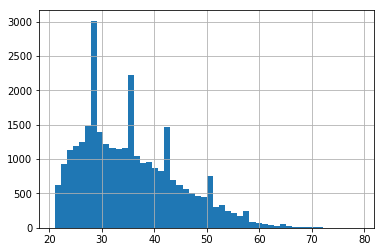

In [15]:
credit['AGE'].hist(bins=50)

In [16]:
def male_female_child(sex):
    #sex = passenger
    
    if sex == 1:
        return 'male'
    else:
        return 'female'

In [17]:
credit['gender'] = credit['SEX'].apply(male_female_child)

In [18]:
credit[:10]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,gender
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,689,0,0,0,0,1,female
1,2,120000,2,2,2,26,-1,2,0,0,...,3455,3261,0,1000,1000,1000,0,2000,1,female
2,3,90000,2,2,2,34,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,0,female
3,4,50000,2,2,1,37,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,0,female
4,5,50000,1,2,1,57,-1,0,-1,0,...,19146,19131,2000,36681,10000,9000,689,679,0,male
5,6,50000,1,1,2,37,0,0,0,0,...,19619,20024,2500,1815,657,1000,1000,800,0,male
6,7,500000,1,1,2,29,0,0,0,0,...,483003,473944,55000,40000,38000,20239,13750,13770,0,male
7,8,100000,2,2,2,23,0,-1,-1,0,...,-159,567,380,601,0,581,1687,1542,0,female
8,9,140000,2,3,1,28,0,0,2,0,...,11793,3719,3329,0,432,1000,1000,1000,0,female
9,10,20000,1,3,2,35,-2,-2,-2,-2,...,13007,13912,0,0,0,13007,1122,0,0,male


In [19]:
credit.groupby(['gender','default'])['SEX'].count()

gender  default
female  0          14349
        1           3763
male    0           9015
        1           2873
Name: SEX, dtype: int64

C:\Software\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


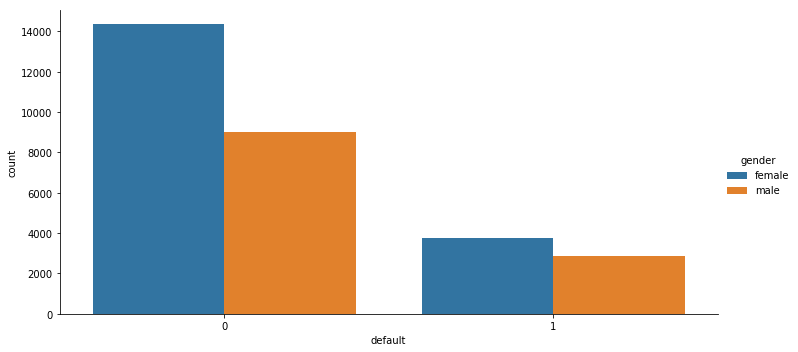

In [20]:
sns.factorplot('default', data=credit, kind='count', hue='gender', order=[0,1], 
               hue_order=['female','male'], aspect=2)

C:\Software\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


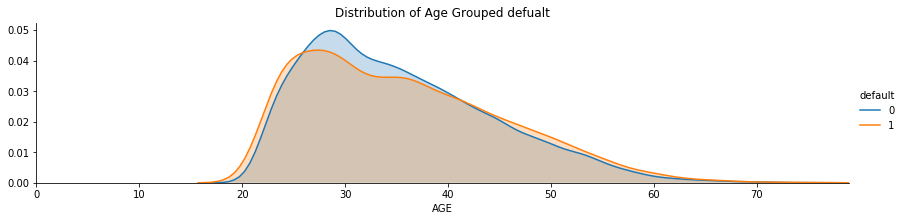

In [21]:
fig = sns.FacetGrid(credit, hue='default', aspect=4)
fig.map(sns.kdeplot, 'AGE', shade=True)
oldest = credit['AGE'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Age Grouped defualt')
fig.add_legend()

In [24]:
bin = [10,20,30,40,50,60,70]
#use pd.cut function can attribute the values into its specific bins
category = pd.cut(credit.AGE,bin)
category = category.to_frame()
category.columns = ['range']
#concatenate age and its bin
credit_new = pd.concat([credit,category],axis = 1)

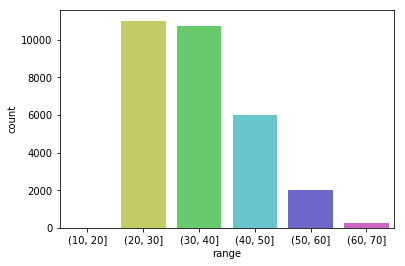

In [25]:
sns.countplot(x = 'range', data = credit_new, palette = 'hls')
plt.show()

In [26]:
credit_new.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,gender,range
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,689,0,0,0,0,1,female,"(20, 30]"
1,2,120000,2,2,2,26,-1,2,0,0,...,3261,0,1000,1000,1000,0,2000,1,female,"(20, 30]"
2,3,90000,2,2,2,34,0,0,0,0,...,15549,1518,1500,1000,1000,1000,5000,0,female,"(30, 40]"
3,4,50000,2,2,1,37,0,0,0,0,...,29547,2000,2019,1200,1100,1069,1000,0,female,"(30, 40]"
4,5,50000,1,2,1,57,-1,0,-1,0,...,19131,2000,36681,10000,9000,689,679,0,male,"(50, 60]"


In [37]:
credit_default = credit_new.drop(['ID','SEX','AGE','LIMIT_BAL','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6'
],axis=1)

In [38]:
credit_default.to_csv('credit_new1.csv')

C:\Software\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


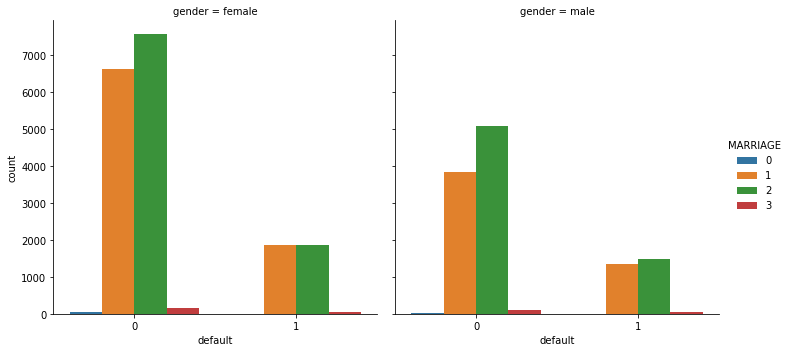

In [39]:
sns.factorplot('default', data=credit_default, hue='MARRIAGE', kind='count', hue_order=range(0,4),
              col='gender')

In [41]:
credit_default.head()

,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default,gender,range
0,2,1,2,2,-1,-1,-2,-2,1,female,"(20, 30]"
1,2,2,-1,2,0,0,0,2,1,female,"(20, 30]"
2,2,2,0,0,0,0,0,0,0,female,"(30, 40]"
3,2,1,0,0,0,0,0,0,0,female,"(30, 40]"
4,2,1,-1,0,-1,0,0,0,0,male,"(50, 60]"


C:\Software\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


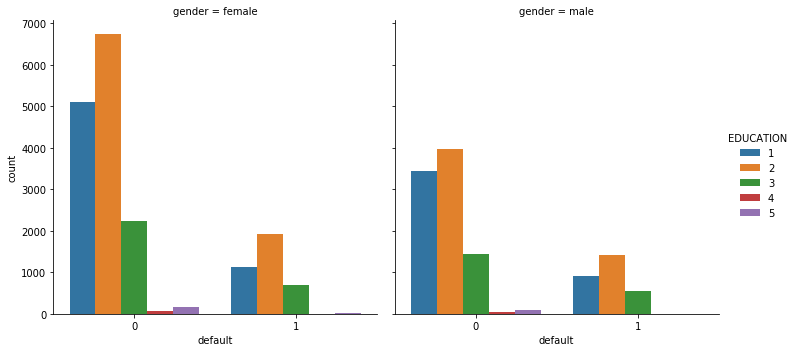

In [76]:
sns.factorplot('default', data=credit_default, hue='EDUCATION', kind='count', hue_order=range(1,6),
              col='gender')

C:\Software\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


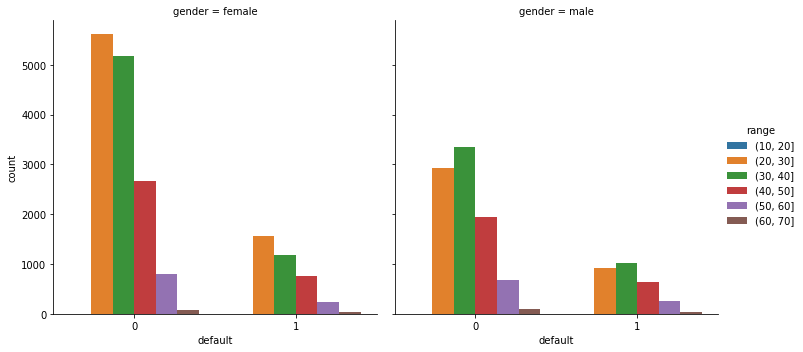

In [78]:
sns.factorplot('default', data=credit_default, hue='range', kind='count',
              col='gender')

C:\Software\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


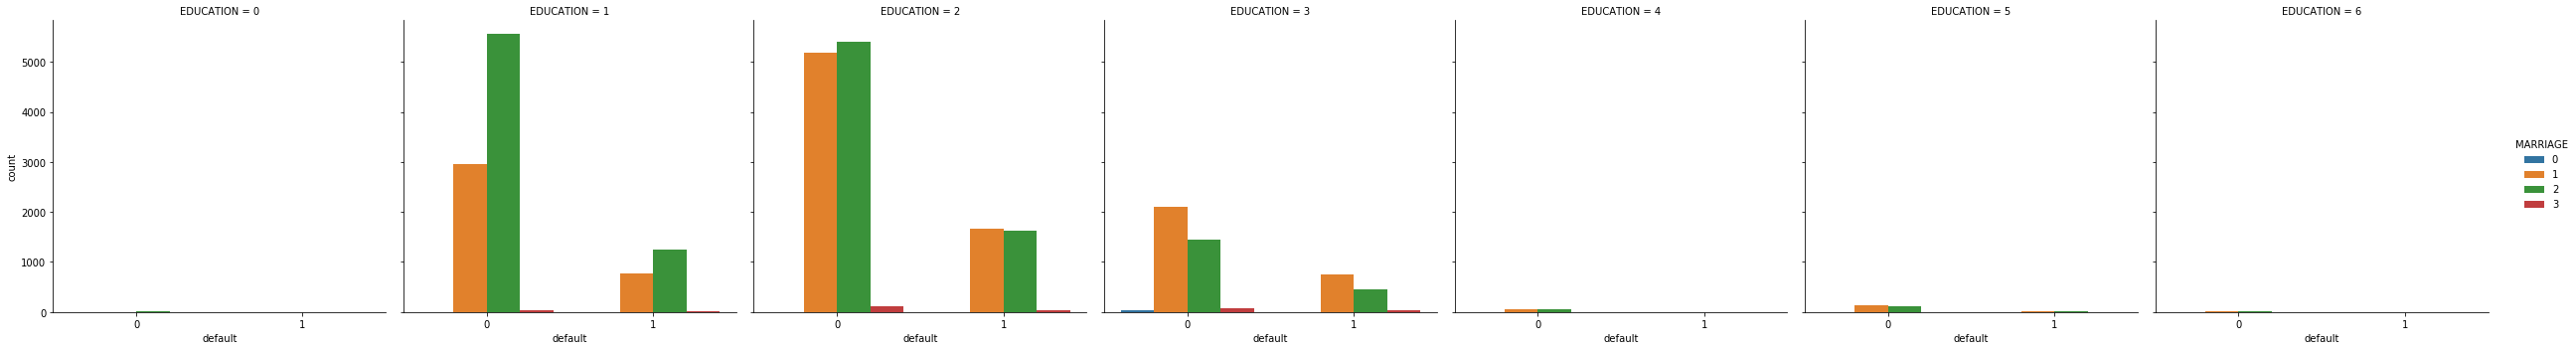

In [84]:
sns.factorplot('default', data=credit_default, hue='MARRIAGE', kind='count',
              col='EDUCATION')

In [89]:
corrMat = credit.corr().abs()
print(corrMat)

           LIMIT_BAL  EDUCATION  MARRIAGE     PAY_0     PAY_2     PAY_3  \
LIMIT_BAL   1.000000   0.219161  0.108139  0.271214  0.296382  0.286123   
EDUCATION   0.219161   1.000000  0.143464  0.105364  0.121566  0.114025   
MARRIAGE    0.108139   0.143464  1.000000  0.019917  0.024199  0.032688   
PAY_0       0.271214   0.105364  0.019917  1.000000  0.672164  0.574245   
PAY_2       0.296382   0.121566  0.024199  0.672164  1.000000  0.766552   
PAY_3       0.286123   0.114025  0.032688  0.574245  0.766552  1.000000   
PAY_4       0.267460   0.108793  0.033122  0.538841  0.662067  0.777359   
PAY_5       0.249411   0.097520  0.035629  0.509426  0.622780  0.686775   
PAY_6       0.235195   0.082316  0.034345  0.474553  0.575501  0.632684   
BILL_AMT1   0.285430   0.023581  0.023472  0.187068  0.234887  0.208473   
BILL_AMT2   0.278314   0.018749  0.021602  0.189859  0.235257  0.237295   
BILL_AMT3   0.283236   0.013002  0.024909  0.179785  0.224146  0.227494   
BILL_AMT4   0.293988   0.

In [1]:
corrMat = credit.corr().abs().unstack().sort_values(kind="quicksort")
print(corrMat)

NameError: name 'credit' is not defined

In [65]:
#data
rawdata = pd.read_csv('credit_new1.csv', header=0)
rawdata.head()

,Unnamed: 0,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default,gender,range
0,0,2,1,2,2,-1,-1,-2,-2,1,female,"(20, 30]"
1,1,2,2,-1,2,0,0,0,2,1,female,"(20, 30]"
2,2,2,2,0,0,0,0,0,0,0,female,"(30, 40]"
3,3,2,1,0,0,0,0,0,0,0,female,"(30, 40]"
4,4,2,1,-1,0,-1,0,0,0,0,male,"(50, 60]"


In [66]:
pwd

'C:\\Users\\Anurag Kumra'

In [67]:
rawData=rawdata.drop(rawdata.columns[0],axis=1)

In [75]:

rawData.head()

,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default,gender,range
0,2,1,2,2,-1,-1,-2,-2,1,female,"(20, 30]"
1,2,2,-1,2,0,0,0,2,1,female,"(20, 30]"
2,2,2,0,0,0,0,0,0,0,female,"(30, 40]"
3,2,1,0,0,0,0,0,0,0,female,"(30, 40]"
4,2,1,-1,0,-1,0,0,0,0,male,"(50, 60]"


Summary of feature sample


,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default,gender,range
0,2,1,2,2,-1,-1,-2,-2,1,female,"(20, 30]"
1,2,2,-1,2,0,0,0,2,1,female,"(20, 30]"
2,2,2,0,0,0,0,0,0,0,female,"(30, 40]"
3,2,1,0,0,0,0,0,0,0,female,"(30, 40]"
4,2,1,-1,0,-1,0,0,0,0,male,"(50, 60]"


In [79]:
df = rawData[ [ col for col in rawData.columns if col != 'default' ] + ['default'] ]

In [80]:
df.head()

,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,gender,range,default
0,2,1,2,2,-1,-1,-2,-2,female,"(20, 30]",1
1,2,2,-1,2,0,0,0,2,female,"(20, 30]",1
2,2,2,0,0,0,0,0,0,female,"(30, 40]",0
3,2,1,0,0,0,0,0,0,female,"(30, 40]",0
4,2,1,-1,0,-1,0,0,0,male,"(50, 60]",0


In [82]:
#features
features = df.iloc[:,0:10]
print('Summary of feature sample')
features.head()

Summary of feature sample


,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,gender,range
0,2,1,2,2,-1,-1,-2,-2,female,"(20, 30]"
1,2,2,-1,2,0,0,0,2,female,"(20, 30]"
2,2,2,0,0,0,0,0,0,female,"(30, 40]"
3,2,1,0,0,0,0,0,0,female,"(30, 40]"
4,2,1,-1,0,-1,0,0,0,male,"(50, 60]"


In [83]:
#dependent variable
depVar = df['default']

In [85]:
#Training Set (Feature Space: X Training)
X_train = (features[: 21000])
X_train.head()


#Dependent Variable Training Set (y Training)
y_train = depVar[: 21000]
y_train_count = len(y_train.index)
print('The number of observations in the Y training set are:',str(y_train_count))
y_train.head()



#Testing Set (X Testing)
X_test = features[-9000:]
X_test_count = len(X_test.index)
print('The number of observations in the feature testing set is:',str(X_test_count))
print(X_test.head())



#Ground Truth (y_test) 
y_test = depVar[-9000:]
y_test_count = len(y_test.index)
print('The number of observations in the Y training set are:',str(y_test_count))
y_test.head()

The number of observations in the Y training set are: 21000
The number of observations in the feature testing set is: 9000
       EDUCATION  MARRIAGE  PAY_0  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6 gender  \
21000          2         1      1     -1     -1     -1      0      0   male   
21001          3         1      2      0      0      0      0      0   male   
21002          2         1      0      0      0      0      0      0   male   
21003          2         2      2      0      0      0     -2     -2   male   
21004          2         2      2      0      0      0      0      2   male   

          range  
21000  (30, 40]  
21001  (30, 40]  
21002  (30, 40]  
21003  (30, 40]  
21004  (30, 40]  
The number of observations in the Y training set are: 9000


21000    0
21001    1
21002    0
21003    1
21004    1
Name: default, dtype: int64